In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import tensorflow as tf
from sklearn.metrics import mean_squared_error,r2_score

In [44]:
data=pd.read_csv('TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [46]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [47]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [48]:
data.sort_values(by='Date')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


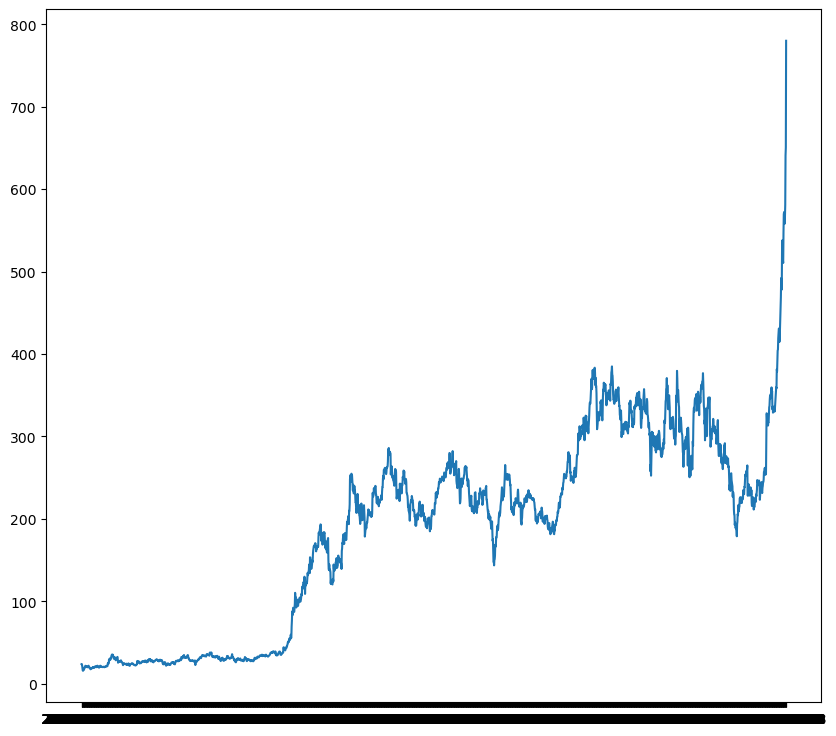

In [49]:
plt.figure(figsize=(10,9))
plt.plot(data['Date'],data['Close'])

In [50]:
closed=data['Close']
closed

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [51]:
scalar=MinMaxScaler(feature_range=(0,1))
closed=scalar.fit_transform(np.array(closed).reshape(-1,1))
closed


array([[0.01058623],
       [0.01050772],
       [0.00806072],
       ...,
       [0.81786181],
       [0.83063335],
       [1.        ]])

In [52]:
train_size=int(len(closed)*0.7)
test_size=len(closed)-train_size

train,test=closed[0:train_size,:],closed[train_size:len(closed),:1]
train.shape,test.shape

((1691, 1), (725, 1))

In [53]:
def create_dataset(dataset,time_step=1):
    datax,datay=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax,dtype=np.float32),np.array(datay,dtype=np.float32)

In [54]:
time_step=100
x_train,y_train=create_dataset(train,time_step)
x_test,y_test=create_dataset(test,time_step)
y_train.shape

(1590,)

In [55]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [56]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
x_train=tf.convert_to_tensor(x_train)
y_train=tf.convert_to_tensor(y_train)

In [ ]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
23/23 [==============================] - 13s 225ms/step - loss: 0.0049 - val_loss: 4.1388e-04
Epoch 2/60
23/23 [==============================] - 4s 185ms/step - loss: 4.6647e-04 - val_loss: 3.7319e-04
Epoch 3/60
23/23 [==============================] - 5s 197ms/step - loss: 3.7149e-04 - val_loss: 4.1730e-04
Epoch 4/60
23/23 [==============================] - 4s 190ms/step - loss: 3.3369e-04 - val_loss: 3.4417e-04
Epoch 5/60
23/23 [==============================] - 4s 187ms/step - loss: 3.2221e-04 - val_loss: 3.3984e-04
Epoch 6/60
23/23 [==============================] - 4s 172ms/step - loss: 3.0004e-04 - val_loss: 3.2579e-04
Epoch 7/60
23/23 [==============================] - 4s 175ms/step - loss: 3.0755e-04 - val_loss: 3.0382e-04
Epoch 8/60
23/23 [==============================] - 4s 186ms/step - loss: 3.0980e-04 - val_loss: 3.0125e-04
Epoch 9/60
23/23 [==============================] - 4s 173ms/step - loss: 2.6790e-04 - val_loss: 2.9783e-04
Epoch 10/60
23/23 [============

In [ ]:
train_predicted=model.predict(x_train)
predicted=model.predict(x_test)

In [ ]:
train_predicted=model.predict(x_train)
predicted=model.predict(x_test)

In [ ]:
print("root mean squared error",np.sqrt(mean_squared_error(y_test,predicted)))

In [ ]:
look_back=100

train_predictedplt=np.empty_like(closed)
train_predictedplt[:,:]=np.nan
train_predictedplt[look_back:len(train_predicted)+look_back,:]=train_predicted

predictedplt=np.empty_like(closed)
predictedplt[:,:]=np.nan
predictedplt[len(train_predicted)+(look_back*2)+1:len(closed)-1,:]=predicted


plt.figure(figsize=(10,8))
plt.plot(scalar.inverse_transform(closed))
plt.plot(train_predictedplt)
plt.plot(predictedplt)
plt.show()


In [ ]:
len(test)

In [ ]:
predicted_input=test[290:].reshape(1,-1)
predicted_input.shape

In [ ]:
temp_input=list(predicted_input)
temp_input=temp_input[0].tolist()


In [ ]:
temp_input

In [ ]:
new_day=np.arange(1,81)
predicted_day=np.arange(81,101)
len(closed)

In [ ]:
new_data=closed.tolist()
new_data.extend(output)
len(new_data)

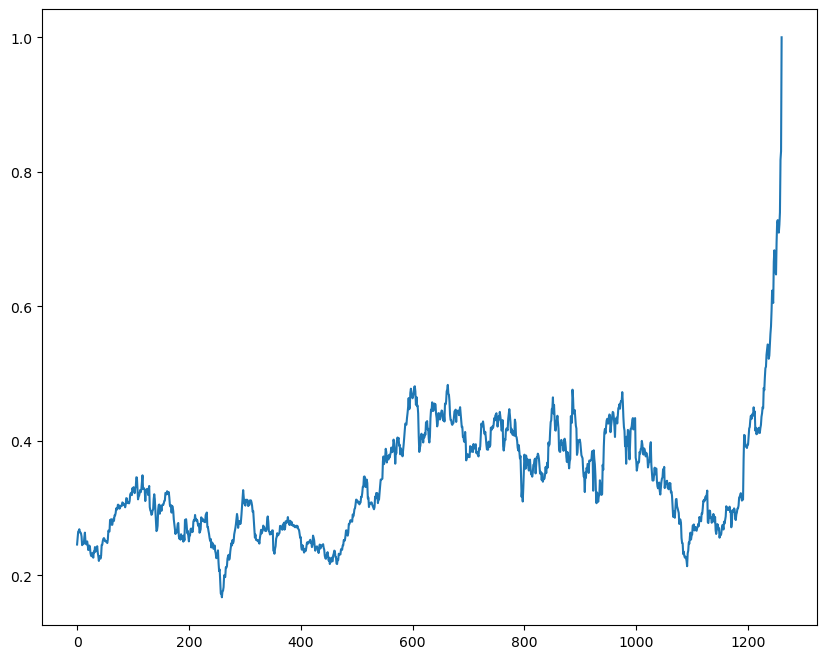

In [39]:
plt.figure(figsize=(10,8))
plt.plot(new_data[1155:])
